In [13]:
### CNN Convolutional nuenal network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dropout, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as k
k.set_image_dim_ordering('th')

import numpy as np

In [14]:
seed = 7
np.random.seed(seed)

In [15]:
# Load data

(data_X_train, data_y_train), (data_X_test, data_y_test) = mnist.load_data()
X_train, y_train , X_test, y_test  = data_X_train, data_y_train , data_X_test, data_y_test

In [16]:
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')

In [17]:
# Normalization and encoding
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_calsses = y_test.shape[1]
num_calsses

10

In [25]:
def baseline_model ():
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape = (1,28,28), activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu'))
    model.add(Dense(num_calsses, activation= 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

In [26]:
baseline_model()

In [27]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 185s - loss: 0.2375 - acc: 0.9321 - val_loss: 0.0766 - val_acc: 0.9767
Epoch 2/10
 - 186s - loss: 0.0708 - acc: 0.9787 - val_loss: 0.0456 - val_acc: 0.9856
Epoch 3/10
 - 187s - loss: 0.0500 - acc: 0.9849 - val_loss: 0.0433 - val_acc: 0.9864
Epoch 4/10
 - 189s - loss: 0.0413 - acc: 0.9871 - val_loss: 0.0412 - val_acc: 0.9863
Epoch 5/10
 - 181s - loss: 0.0338 - acc: 0.9893 - val_loss: 0.0420 - val_acc: 0.9861
Epoch 6/10
 - 181s - loss: 0.0267 - acc: 0.9918 - val_loss: 0.0362 - val_acc: 0.9889
Epoch 7/10
 - 181s - loss: 0.0220 - acc: 0.9931 - val_loss: 0.0351 - val_acc: 0.9883
Epoch 8/10
 - 216s - loss: 0.0200 - acc: 0.9935 - val_loss: 0.0323 - val_acc: 0.9897
Epoch 9/10
 - 228s - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0395 - val_acc: 0.9869
Epoch 10/10
 - 213s - loss: 0.0150 - acc: 0.9951 - val_loss: 0.0376 - val_acc: 0.9875


In [28]:
data_y_train[0]

5

In [34]:
X_5 = data_X_train[0].reshape(1,1,28,28)
y_5 = model.predict(X_5)
print(np.argmax(y_5))

5


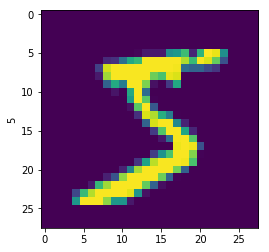

In [39]:
import matplotlib.pyplot as plt
plt.imshow(data_X_train[0].reshape(28,28))
plt.ylabel(np.argmax(y_5))
plt.show()